# **Jacob Shearer - Excercise Set 2**

In [33]:
import numpy as np
import scipy as sp
import cProfile
import scipy.optimize
import matplotlib.pyplot as plt

**Question  1:**

In [2]:
# Part (a):
def o2_forward_diff(x, h):
    analytic_original = x * np.e**x
    analytic_2nd_derivative = (x + 2) * np.e**x
    
    approx_2nd_derivative = (((x + 2*h) * np.e**(x + 2*h)) - 2*((x + h) * np.e**(x + h)) + (x * np.e**x))/h**2
    
    error = np.abs(analytic_2nd_derivative - approx_2nd_derivative)
    return approx_2nd_derivative, error

def o2_central_diff(x, h):
    analytic_original = x * np.e**x
    analytic_2nd_derivative = (x + 2) * np.e**x
    
    approx_2nd_derivative = (((x + h) * np.e**(x + h)) + ((x - h) * np.e**(x - h)) - (2*(x * np.e**x)))/h**2
    
    error = np.abs(analytic_2nd_derivative - approx_2nd_derivative)
    return approx_2nd_derivative, error

In [3]:
print('Part (a):')
print('\n')

x = 2.0
h_values = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
forward_diff_errors = np.array([])
central_diff_errors = np.array([])

print('For the forward difference algorithm:')
for h in h_values:
    derivative, error = o2_forward_diff(x, h)
    print(f'     h = {h}: 2nd derivative = {derivative}')
    forward_diff_errors = np.append(forward_diff_errors, error)

print('\n')

print('For the central difference algorithm:')
for h in h_values:
    derivative, error = o2_central_diff(x, h)
    print(f'     h = {h}: 2nd derivative = {derivative}')
    central_diff_errors = np.append(central_diff_errors, error)

Part (a):


For the forward difference algorithm:
     h = 0.5: 2nd derivative = 56.48901265562777
     h = 0.45: 2nd derivative = 52.840665901489125
     h = 0.4: 2nd derivative = 49.449228311583404
     h = 0.35: 2nd derivative = 46.295593051415196
     h = 0.3: 2nd derivative = 43.36213107464438
     h = 0.25: 2nd derivative = 40.63257337610585
     h = 0.2: 2nd derivative = 38.09190284727485
     h = 0.15: 2nd derivative = 35.726254936453714
     h = 0.1: 2nd derivative = 33.52282638322403
     h = 0.05: 2nd derivative = 31.46979135824423


For the central difference algorithm:
     h = 0.5: 2nd derivative = 30.490176446172697
     h = 0.45: 2nd derivative = 30.311130120446194
     h = 0.4: 2nd derivative = 30.151567480308888
     h = 0.35: 2nd derivative = 30.01127487537918
     h = 0.3: 2nd derivative = 29.89006462541654
     h = 0.25: 2nd derivative = 29.78777470550574
     h = 0.2: 2nd derivative = 29.70426847439435
     h = 0.15: 2nd derivative = 29.63943444547823
     h = 0.1

Part (b):


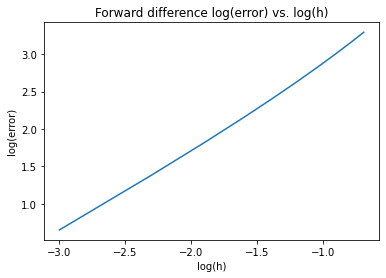

Slope of the plot from fit: 1.1484436672600484
This slope indicates that the forward difference error is proportional to h to the power of one, as expected.


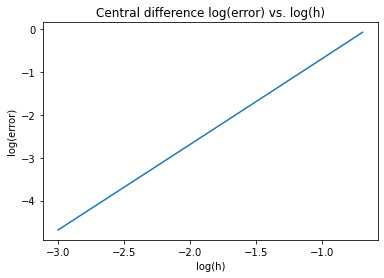

Slope of the plot from fit: 2.004474194878627
This slope indicates that the central difference error is proportional to h to the power of two, as expected.


In [4]:
# Part (b)
print('Part (b):')

fit_function = lambda x, a, b: a*x + b

# Forward difference plot
plt.plot(np.log(h_values), np.log(forward_diff_errors))
plt.title('Forward difference log(error) vs. log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

fd_params, fd_pcov = sp.optimize.curve_fit(fit_function, np.log(h_values), np.log(forward_diff_errors))
print(f'Slope of the plot from fit: {fd_params[0]}')
print('This slope indicates that the forward difference error is proportional to h to the power of one, as expected.')

# Central difference plot
plt.plot(np.log(h_values), np.log(central_diff_errors))
plt.title('Central difference log(error) vs. log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

cd_params, cd_pcov = sp.optimize.curve_fit(fit_function, np.log(h_values), np.log(central_diff_errors))
print(f'Slope of the plot from fit: {cd_params[0]}')
print('This slope indicates that the central difference error is proportional to h to the power of two, as expected.')

This works because the error of each derivative, $\epsilon$, is related to the step size, $h$, by a power law, or:
    $$ \epsilon = kh^n$$
<br/>
Where $k$ is an arbitrary constant and $n$ is the power law exponent that relates $\epsilon$ and $h$. When we calculate the slopes of these plots, we are essentially just computing the following expression:
    $$ slope = \frac{log(\epsilon_2) - log(\epsilon_1)}{log(h_2) - log(h_1)} = \frac{log(kh_2^n) - log(kh_1^n)}{log(h_2) - log(h_1)}$$
<br/>
Logarithms have the following properties:
    $$ log(x^n) = n \cdot log(x) $$
<br/>
    $$ log(a) - log(b) = log(\frac{a}{b})$$
<br/>
Applying these properties to the expression, 
    $$ slope = \frac{n(log(kh_2) - log(kh_1))}{log(h_2) - log(h_1)}$$
<br/>
    $$ = \frac{nlog(\frac{h_2}{h_1})}{log(\frac{h_2}{h_1})} $$
<br/>
    $$ = n$$
<br/>
Therefore, the slope of a log-log plot is just equal to the power law exponent. 

**Question 2:**

In [5]:
# Part (a):
def pmt_signal(time, stepsize, amplitude):
    times = np.arange(1, time, stepsize)
    # times = np.arange(1, time + stepsize, stepsize) for times[-1] = time, but this is an odd number of points
    function = lambda A, t: A * np.e**((-1/2) * (np.log(t/7)/0.45)**2)
    signal = function(amplitude, times)
    return times, signal

Part (a):


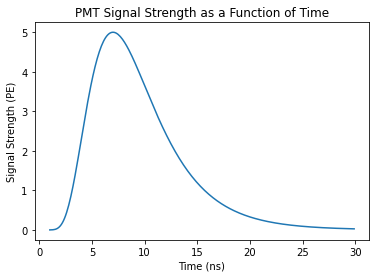

In [6]:
print('Part (a):')
times, signal = pmt_signal(30, 0.1, 5)
plt.plot(times, signal)
plt.title('PMT Signal Strength as a Function of Time')
plt.xlabel('Time (ns)')
plt.ylabel('Signal Strength (PE)')
plt.show()

In [7]:
# Part (b):
def trap_integration(x, y):
    assert len(x) == len(y), 'x and y arrays are not the same shape.'
    h = (x[-1] - x[0])/(len(x) - 1)
    sum = 0.0
    for i in range(len(x)):
        weight = h/2 if x[i] == x[0] or x[i] == x[-1] else h
        sum += y[i] * weight
    
    return sum

In [8]:
print('Part (b):')
my_integration = trap_integration(times, signal)
print(f'The result of my trapezoidal integration algorithm is {my_integration}')

numpy_integration = np.trapz(signal, times)
print(f"The result of numpy's trapezoidal integration algorithm is {numpy_integration}")

print(f"The difference between these results is only {np.abs(my_integration-numpy_integration)}, so they're pretty close.")

Part (b):
The result of my trapezoidal integration algorithm is 43.566001566827104
The result of numpy's trapezoidal integration algorithm is 43.56600156682708
The difference between these results is only 2.1316282072803006e-14, so they're pretty close.


In [9]:
# Part (c):
def simp_integration(x, y):
    assert len(x) == len(y), 'x and y arrays are not the same shape'
    if len(x) % 2 == 0:
        raise Exception("The number of points (lengths of x and y) must be odd!")
    
    h = (x[-1] - x[0])/(len(x) - 1)
    sum = 0.0
    for i in range(len(x)):
        if x[i] == x[0] or x[i] == x[-1]:
            weight = h/3
        elif i % 2 == 0:
            weight = (2*h)/3
        else:
            weight = (4*h)/3
            
        sum += y[i] * weight
        
    return sum

In [10]:
print('Part (c):')
try:
    integration = simp_integration(times, signal)
except Exception as ex:
    print(ex)

integration = simp_integration(times[0:-1], signal[0:-1])
print(f'The result of my simpson integration algorithm is {integration}')
print(f"""This only differs from my trapezoidal algorithm result by {np.abs(integration-my_integration)}, 
so they're fairly similar.""")

Part (c):
The number of points (lengths of x and y) must be odd!
The result of my simpson integration algorithm is 43.56323355835881
This only differs from my trapezoidal algorithm result by 0.0027680084682941697, 
so they're fairly similar.


In [28]:
# Part (d):
print('Part (d):')
cp = cProfile.Profile()
cp.enable()
for i in range(10000):
    test_integration = trap_integration(times, signal)
cp.disable()
cp.print_stats()

print (f'''According to this measurement, it takes about 1.5 seconds to integrate 10,000 signals with the 
trapezoidal algorithm.''')

Part (d):
         50045 function calls in 1.559 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.003    0.003    1.558    1.558 1375165435.py:5(<module>)
        1    0.000    0.000    0.000    0.000 1375165435.py:7(<module>)
    10000    1.552    0.000    1.555    0.000 540421920.py:2(trap_integration)
        2    0.000    0.000    0.000    0.000 codeop.py:142(__call__)
        4    0.000    0.000    0.000    0.000 compilerop.py:166(extra_flags)
        2    0.000    0.000    0.000    0.000 contextlib.py:114(__enter__)
        2    0.000    0.000    0.000    0.000 contextlib.py:123(__exit__)
        2    0.000    0.000    0.000    0.000 contextlib.py:261(helper)
        2    0.000    0.000    0.000    0.000 contextlib.py:86(__init__)
        2    0.000    0.000    0.000    0.000 hooks.py:103(__call__)
        2    0.000    0.000    0.000    0.000 hooks.py:168(pre_run_code_hook)
        2    0.000    0.000  

**Question 3:**

   $$ \int_{0}^{\pi/2}\frac{d\theta}{1 + \cos(\theta)} = 1 $$ 

In [29]:
def romberg_integration(a, b, function, estimation_num, correct=None, print_estimates=False):
    m = 5
    k = 1
    integration = 0
    x = np.linspace(a, b, num=(2**(m)))
    first_term = trap_integration(x, function(x))
    second_term = 0
    for i in range(estimation_num):
        x = np.linspace(a, b, num=(2**(m + k)))
        y = function(x)
        second_term = trap_integration(x, y)
        integration = ((4**k) * second_term - first_term)/(4**k - 1)
        default_string = f'Estimation {i + 1}: {integration}.'
        string = default_string + f' Relative error: {correct - integration}' if correct is not None else default_string
        if print_estimates:
            print(string)
        
        first_term = integration
        k += 1
        
    return integration

In [30]:
function = lambda t: 1/(1 + np.cos(t))
rom_integration = romberg_integration(0, np.pi/2, function, 8, correct=1, print_estimates=True)
print('\n')
print(f'The final result of the Romberg integration algorithm is {"%.8f" % rom_integration}.')

Estimation 1: 0.9999977654998351. Relative error: 2.2345001648993446e-06
Estimation 2: 1.000013746942148. Relative error: -1.3746942147951913e-05
Estimation 3: 1.0000029940953141. Relative error: -2.994095314123868e-06
Estimation 4: 1.0000007787844363. Relative error: -7.787844362727725e-07
Estimation 5: 1.0000001959057172. Relative error: -1.9590571720407013e-07
Estimation 6: 1.0000000490349057. Relative error: -4.903490569141411e-08
Estimation 7: 1.0000000122594532. Relative error: -1.2259453230356598e-08
Estimation 8: 1.0000000030645353. Relative error: -3.064535292196524e-09


The final result of the Romberg integration algorithm is 1.00000000.


**Question 4:**

In [31]:
# Part (a):
print('Part (a):')
stepsize = 0.1
v_values = np.arange(0, 20 + stepsize, stepsize)
i_frac_values = np.array([])
for v in v_values:
    c_function = lambda w: np.cos((np.pi * w**2)/2)
    s_function = lambda w: np.sin((np.pi * w**2)/2)
    C_v = romberg_integration(0, v, c_function, 8)
    S_v = romberg_integration(0, v, s_function, 8)
    i_frac = 0.5 * ((C_v + 0.5)**2 + (S_v + 0.5)**2)
    i_frac_values = np.append(i_frac_values, i_frac)

print(f'v values: \n{v_values}')
print('\n')
print(f'I/I_0 values: \n{i_frac_values}')

Part (a):
v values: 
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 

Part (b):


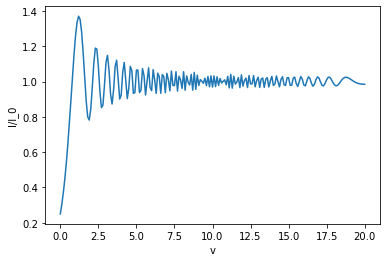

In [32]:
# Part(b):
print('Part (b):')
plt.plot(v_values, i_frac_values)
plt.xlabel('v')
plt.ylabel('I/I_0')
plt.show()